Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update the path if necessary)
dataset = 'airline_passenger_satisfaction.csv'
df = pd.read_csv(dataset)

Overview of the data

In [ ]:
# Check the first few rows
print(df.head())
# Check data types and non-null values
print(df.info())
# Check for basic statistics of numerical columns
print(df.describe())

   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanlines

Understanding feature values.

In [ ]:
print(df['Gender'].unique())
print(df['Customer Type'].value_counts())

['Male' 'Female']
Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64


Distribution for satisfaction. The Satisfaction column groups Neutral and Dissatisfied responses together, resulting in two categories: Satisfied and Neutral or Dissatisfied. We decided to keep these categories as they are because:

The dataset was designed this way, and splitting them could deviate from the original intent of the data. Furthermore
combining Neutral and Dissatisfied simplifies the analysis and aligns with our project goals, especially Goal 3, which focuses on predicting satisfied customers.
Also, retaining the grouped categories ensures consistency and reduces potential bias introduced by attempting to infer separate categories where none were explicitly provided.

In [ ]:
print(df['Satisfaction'].value_counts())

Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64


Handling Missing Values

In [ ]:
print(df.isnull().sum())

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

Identifying Rows with Missing Arrival Delay

In [ ]:
missing_arrival_delay = df[df['Arrival Delay'].isnull()]
print(missing_arrival_delay)

            ID  Gender  Age Customer Type Type of Travel         Class  \
246        247    Male   11     Returning       Business      Business   
883        884    Male   39     Returning       Business      Business   
1965      1966    Male   36     Returning       Business       Economy   
2407      2408  Female   55     Returning       Business      Business   
2448      2449    Male   21     Returning       Personal  Economy Plus   
...        ...     ...  ...           ...            ...           ...   
129000  129001    Male   46    First-time       Business      Business   
129003  129004  Female   17    First-time       Business       Economy   
129014  129015    Male   57     Returning       Business      Business   
129015  129016  Female   22     Returning       Business      Business   
129488  129489    Male   23     Returning       Personal       Economy   

        Flight Distance  Departure Delay  Arrival Delay  \
246                 719               38            

 Analyzing Type of Travel for Missing Arrival Delay Rows

In [ ]:
print(missing_arrival_delay['Type of Travel'].value_counts())

Type of Travel
Business    248
Personal    145
Name: count, dtype: int64


 Analyzing Class for Missing Arrival Delay Rows

In [ ]:
print(missing_arrival_delay['Class'].value_counts())

NameError: name 'missing_arrival_delay' is not defined

Analyzing Departure Delay for Missing Arrival Delay Rows

In [ ]:
print(missing_arrival_delay['Departure Delay'].value_counts())

Departure Delay
0      147
4       11
1       11
2       10
16       6
      ... 
414      1
61       1
455      1
142      1
63       1
Name: count, Length: 121, dtype: int64


Comparing Type of Travel Distribution (Missing vs Non-Missing Arrival Delay) and comparing Mean Departure Delay (Missing vs Non-Missing Arrival Delay)

In [ ]:
# Compare the distribution of Type of Travel between missing and non-missing rows
print(df.groupby(df['Arrival Delay'].isnull())['Type of Travel'].value_counts(normalize=True))

# Compare the mean of Departure Delay for missing vs non-missing Arrival Delay rows
print(df.groupby(df['Arrival Delay'].isnull())['Departure Delay'].mean())

Arrival Delay  Type of Travel
False          Business          0.690764
               Personal          0.309236
True           Business          0.631043
               Personal          0.368957
Name: proportion, dtype: float64
Arrival Delay
False    14.643385
True     37.885496
Name: Departure Delay, dtype: float64


Removing the 393 empty rows from Arrival Delay (due to their small proportion of only 0.03% of the data), new dataframe (df_cleaned),  original dataframe (df) will remain unchanged

In [ ]:
# Remove rows with missing 'Arrival Delay' without modifying the original DataFrame in place
df_cleaned = df.dropna(subset=['Arrival Delay'])

# Verify removal
print(df_cleaned.isnull().sum())


ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

Making an Exploratory Data Analysis (EDA)

Overview of key features

In [ ]:
# Summary statistics for numerical features
print(df_cleaned.describe())

                  ID            Age  Flight Distance  Departure Delay  \
count  129487.000000  129487.000000    129487.000000    129487.000000   
mean    64958.335169      39.428761      1190.210662        14.643385   
std     37489.781165      15.117597       997.560954        37.932867   
min         1.000000       7.000000        31.000000         0.000000   
25%     32494.500000      27.000000       414.000000         0.000000   
50%     64972.000000      40.000000       844.000000         0.000000   
75%     97415.500000      51.000000      1744.000000        12.000000   
max    129880.000000      85.000000      4983.000000      1592.000000   

       Arrival Delay  Departure and Arrival Time Convenience  \
count  129487.000000                           129487.000000   
mean       15.091129                                3.057349   
std        38.465650                                1.526787   
min         0.000000                                0.000000   
25%         0.000000  

In [ ]:
# Value counts for key categorical features
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df_cleaned[column].value_counts())
    print("\n")

Value counts for Gender:
Gender
Female    65703
Male      63784
Name: count, dtype: int64


Value counts for Customer Type:
Customer Type
Returning     105773
First-time     23714
Name: count, dtype: int64


Value counts for Type of Travel:
Type of Travel
Business    89445
Personal    40042
Name: count, dtype: int64


Value counts for Class:
Class
Business        61990
Economy         58117
Economy Plus     9380
Name: count, dtype: int64




Visualizing Distributions

Visualizing Numerical Data

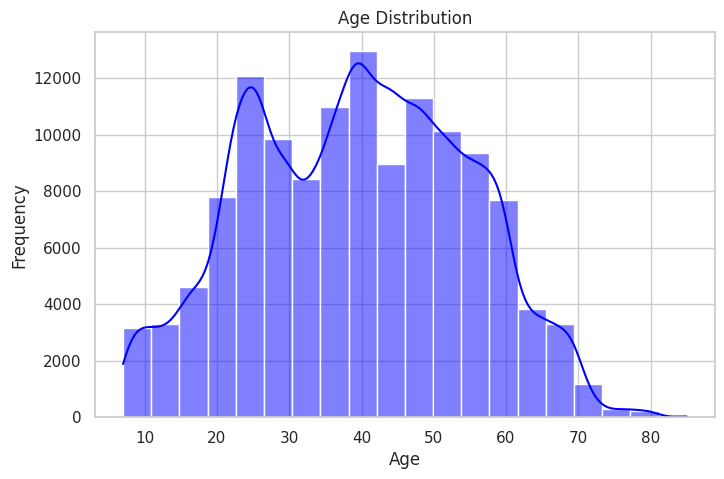

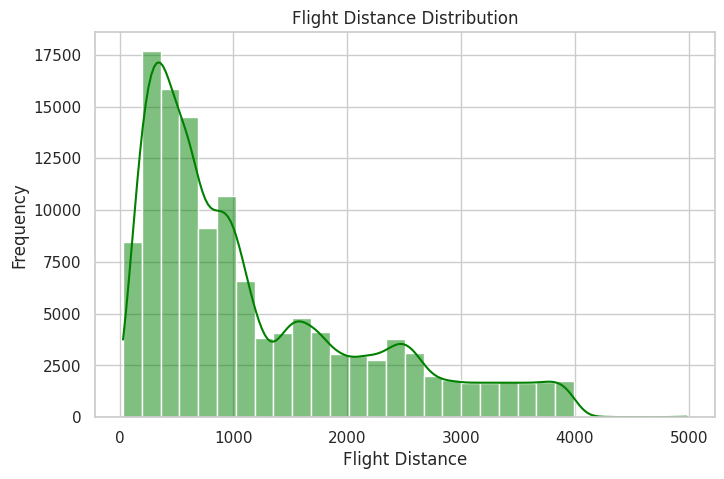

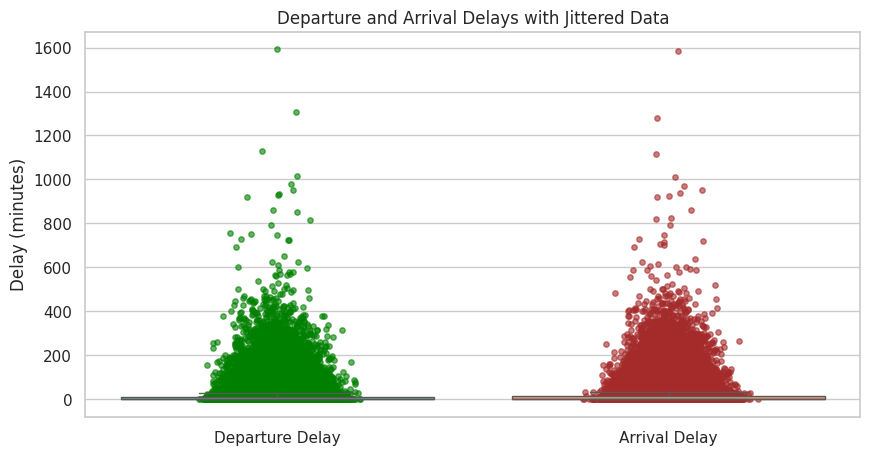

In [ ]:

# Set a consistent style for the plots
sns.set(style="whitegrid")

# 1. Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 2. Histogram for Flight Distance
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flight Distance'], bins=30, kde=True, color='green')
plt.title("Flight Distance Distribution")
plt.xlabel("Flight Distance")
plt.ylabel("Frequency")
plt.show()

# 3. Boxplot for Departure Delay and Arrival Delay with jitter applied to all data points
plt.figure(figsize=(10, 5))

# Create the boxplot without jitter for the box
sns.boxplot(data=df_cleaned[['Departure Delay', 'Arrival Delay']], palette='Set2', showfliers=False)

# Add jitter to the entire dataset by slightly shifting each point
departure_delay = df_cleaned['Departure Delay']
arrival_delay = df_cleaned['Arrival Delay']

# Jitter the points horizontally (slightly) for each category (Departure vs Arrival)
plt.scatter(np.random.normal(0, 0.05, size=len(departure_delay)), departure_delay,
            color='green', alpha=0.6, label='Departure Delays', s=15)

plt.scatter(np.random.normal(1, 0.05, size=len(arrival_delay)), arrival_delay,
            color='brown', alpha=0.6, label='Arrival Delays', s=15)

# Add title and labels
plt.title("Departure and Arrival Delays with Jittered Data")
plt.ylabel("Delay (minutes)")
#plt.legend()
plt.show()

Visualizing Categorical Data

<ipython-input-61-44c7571c0ea8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_cleaned, palette='pastel')


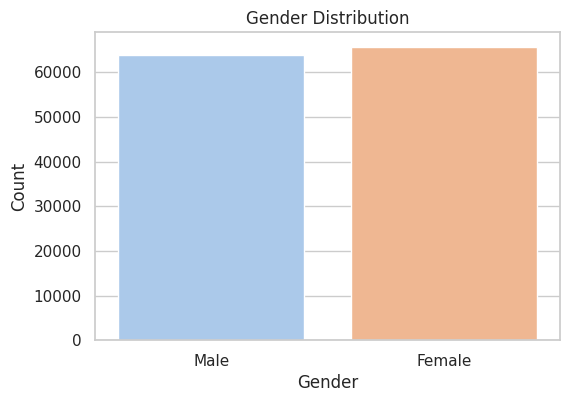

<ipython-input-61-44c7571c0ea8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Type', data=df_cleaned, palette='pastel')


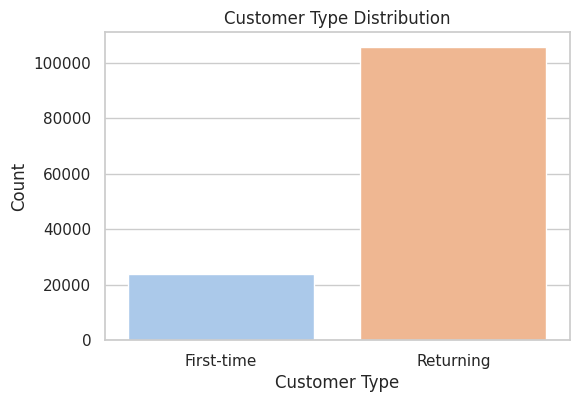

<ipython-input-61-44c7571c0ea8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type of Travel', data=df_cleaned, palette='pastel')


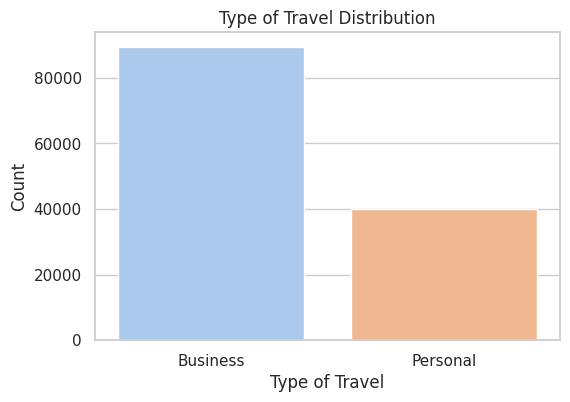

<ipython-input-61-44c7571c0ea8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df_cleaned, palette='pastel')


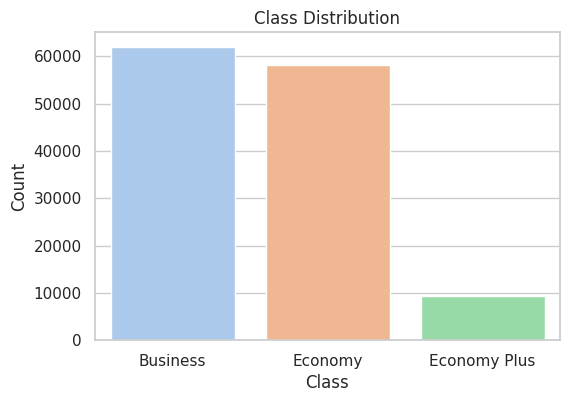

In [ ]:
# 1. Bar chart for Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df_cleaned, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 2. Bar chart for Customer Type
plt.figure(figsize=(6, 4))
sns.countplot(x='Customer Type', data=df_cleaned, palette='pastel')
plt.title("Customer Type Distribution")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.show()

# 3. Bar chart for Type of Travel
plt.figure(figsize=(6, 4))
sns.countplot(x='Type of Travel', data=df_cleaned, palette='pastel')
plt.title("Type of Travel Distribution")
plt.xlabel("Type of Travel")
plt.ylabel("Count")
plt.show()

# 4. Bar chart for Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df_cleaned, palette='pastel')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Exploring Relationships Between Variables

Correlation Analysis (For Numerical Variables, checking the correlation between numerical variables to identify potential relationships)

In [ ]:
print(df_cleaned.columns)

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')


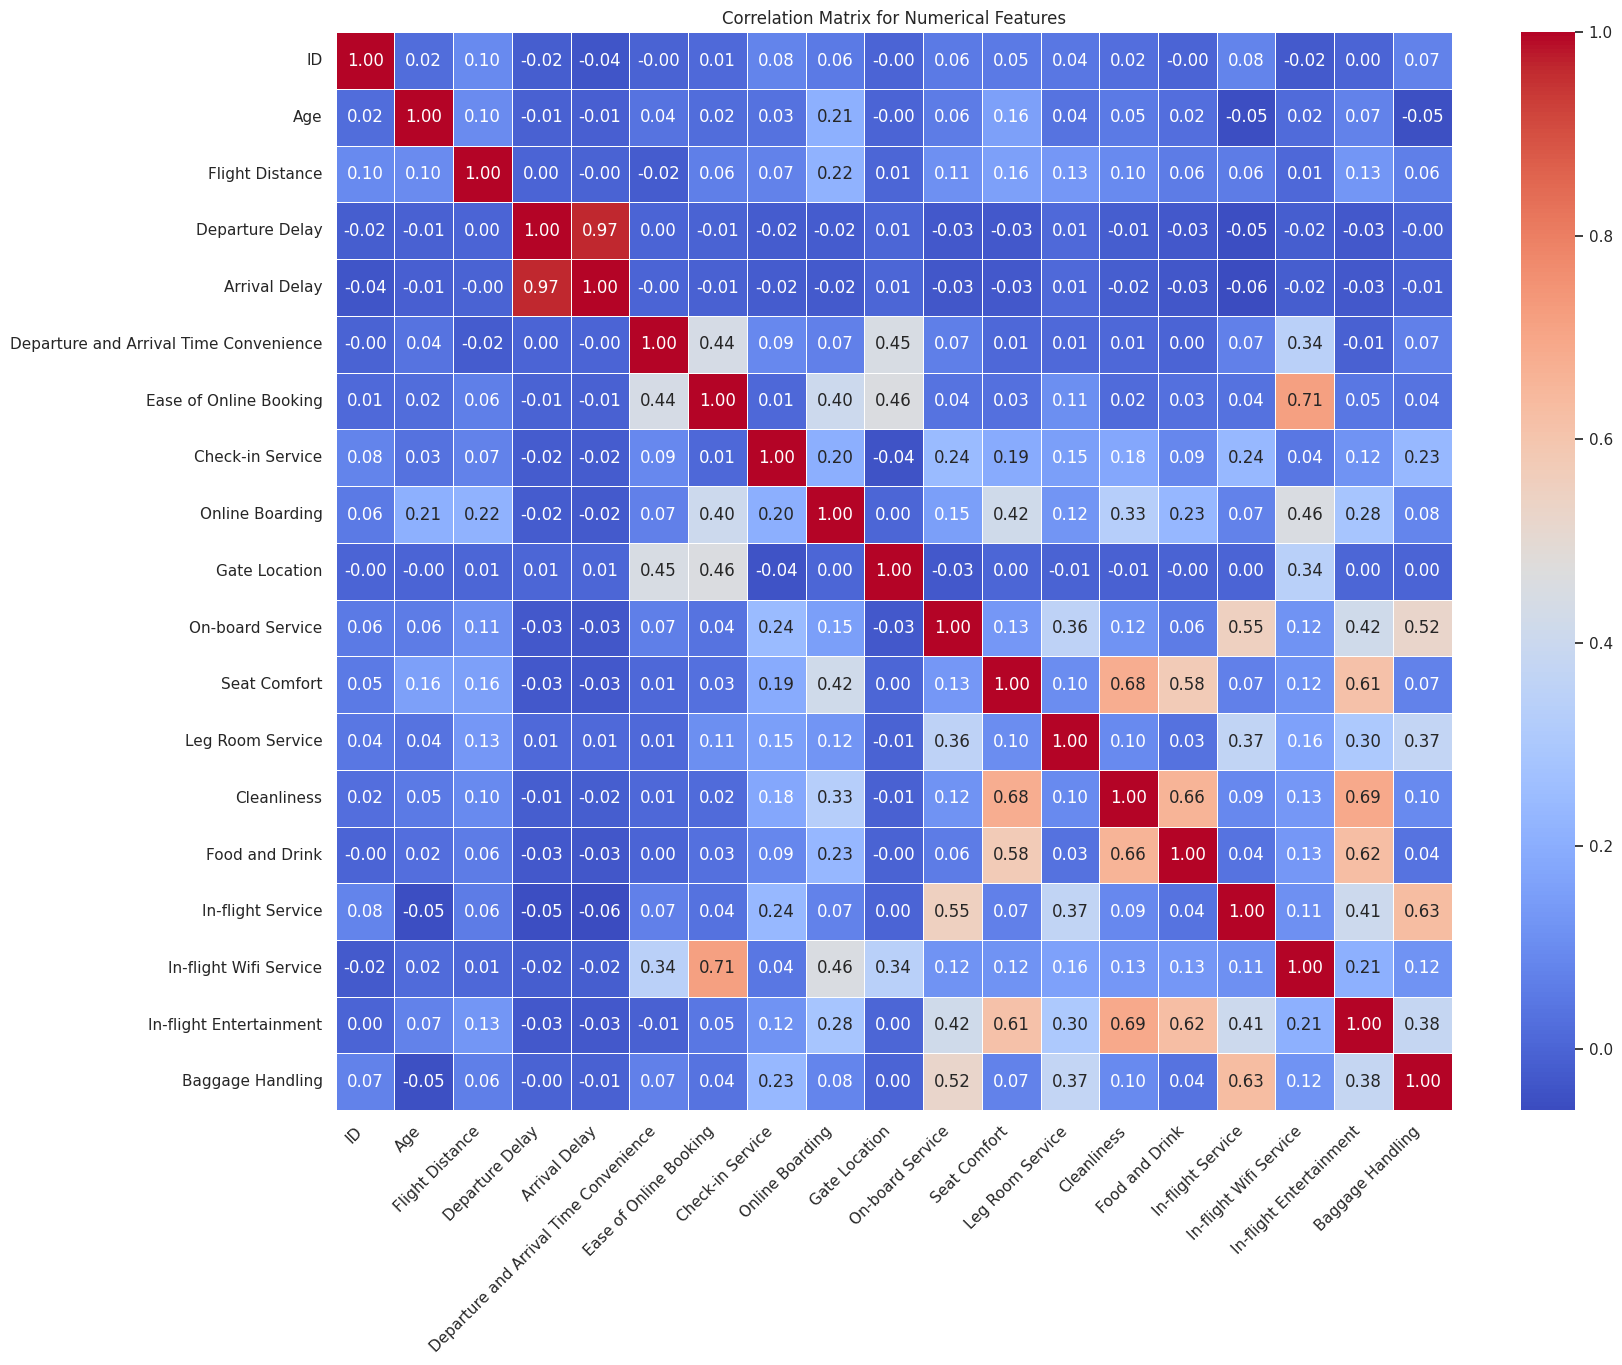

In [ ]:
# Filter only numerical columns
numerical_df = df_cleaned.select_dtypes(include=[np.number])

# Compute the correlation matrix for only numerical features
corr_matrix = numerical_df.corr()

# Display the correlation matrix
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Rotate the labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title("Correlation Matrix for Numerical Features")
plt.show()

Visualizing Relationships Between Strongly Correlated Variables

"Based on the correlation matrix, the following visualizations explore the relationships between variables with strong correlations, starting with Departure Delay vs. Arrival Delay."

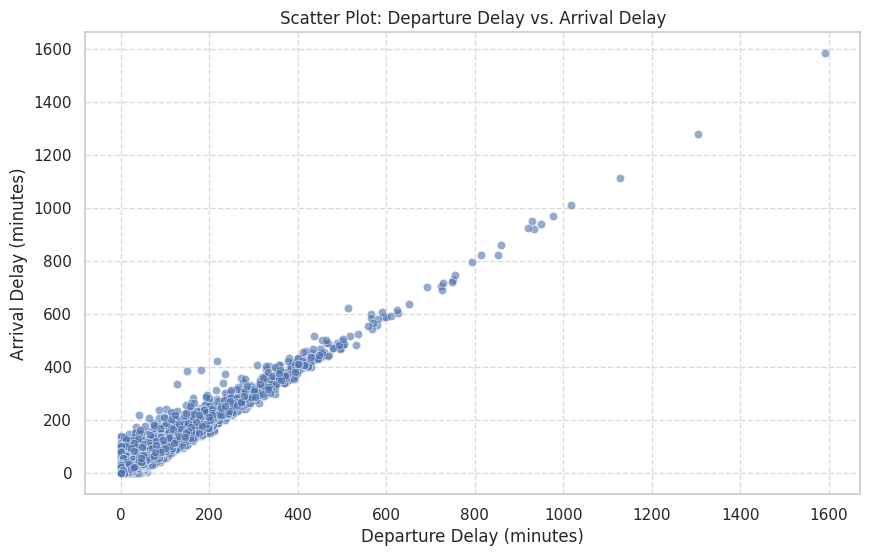

In [ ]:
# Scatter plot for Departure Delay vs. Arrival Delay
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Departure Delay', y='Arrival Delay', alpha=0.6)
plt.title('Scatter Plot: Departure Delay vs. Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Visualizing Ease of Online Booking vs. In-flight WiFi Service.

<ipython-input-65-a5d1afb5170b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Ease of Online Booking', y='In-flight Wifi Service', data=df_cleaned, palette='muted')


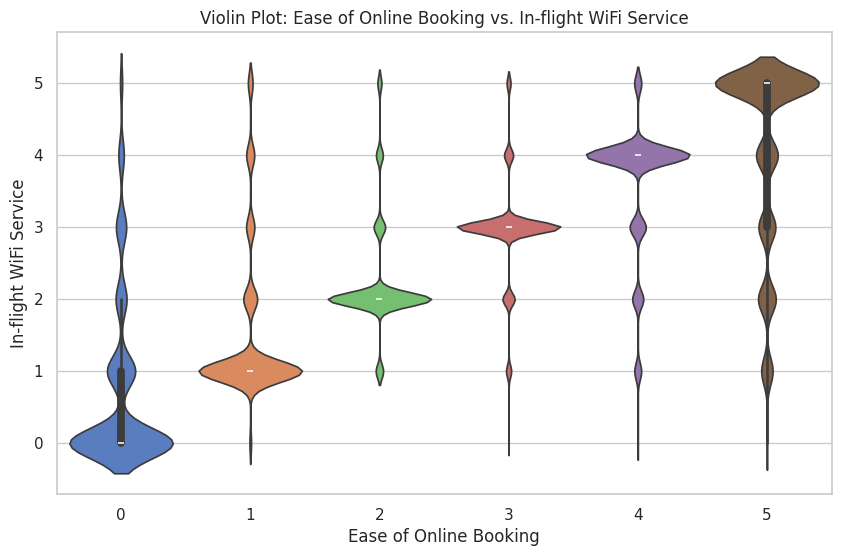

In [ ]:
# Violin plot to compare distributions
plt.figure(figsize=(10, 6))
sns.violinplot(x='Ease of Online Booking', y='In-flight Wifi Service', data=df_cleaned, palette='muted')
plt.title('Violin Plot: Ease of Online Booking vs. In-flight WiFi Service')
plt.xlabel('Ease of Online Booking')
plt.ylabel('In-flight WiFi Service')
plt.show()

Seat Comfort vs. Cleanliness

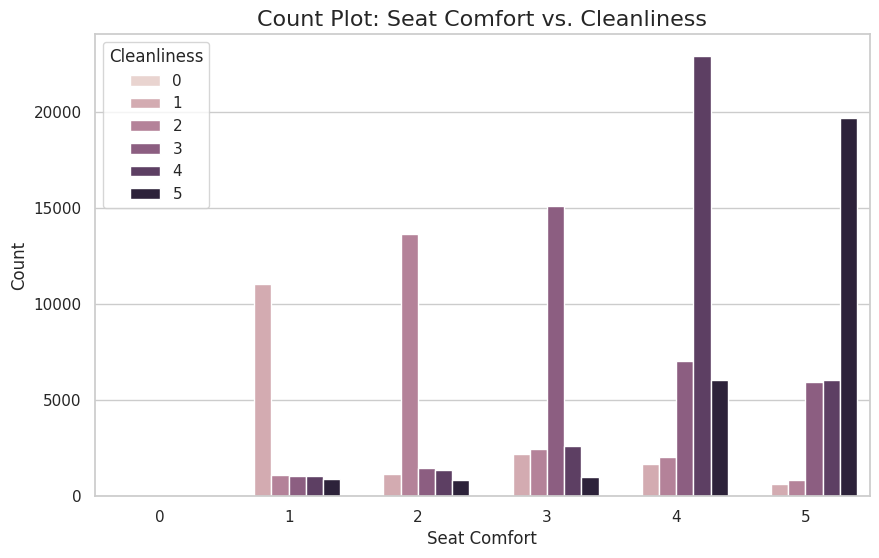

In [ ]:
# Count plot for Seat Comfort vs. Cleanliness
plt.figure(figsize=(10, 6))
sns.countplot(x='Seat Comfort', hue='Cleanliness', data=df)
plt.title('Count Plot: Seat Comfort vs. Cleanliness', fontsize=16)
plt.xlabel('Seat Comfort', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In-flight Entertainment vs. Cleanliness

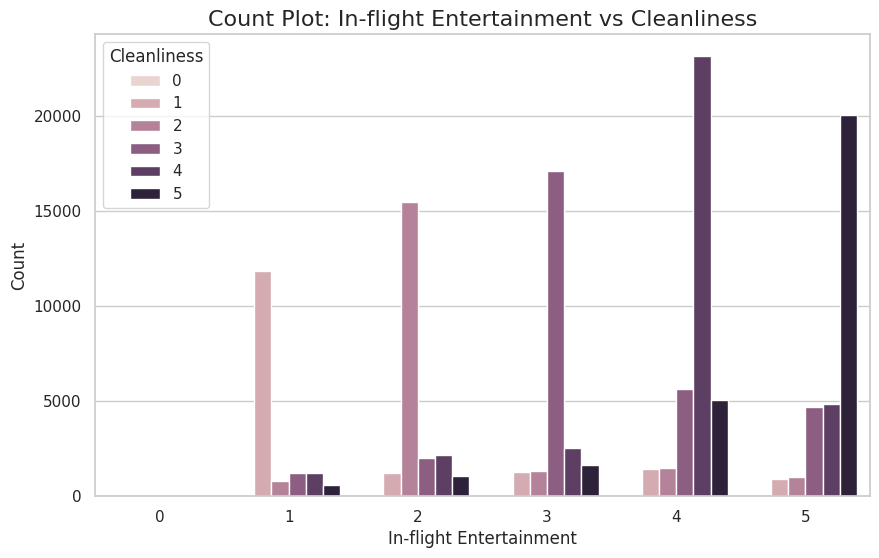

In [ ]:
# Count plot for In-flight Entertainment vs Cleanliness
plt.figure(figsize=(10, 6))
sns.countplot(x='In-flight Entertainment', hue='Cleanliness', data=df)
plt.title('Count Plot: In-flight Entertainment vs Cleanliness', fontsize=16)
plt.xlabel('In-flight Entertainment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

 Cleanliness vs. Food and Drink

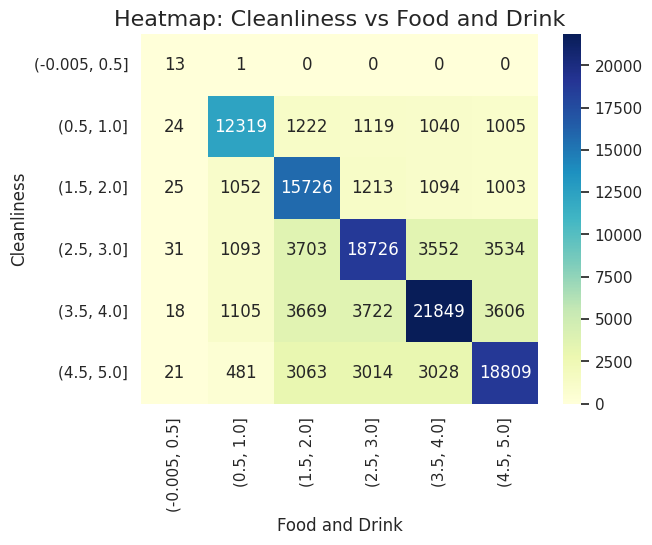

In [ ]:
# Create binned data for Cleanliness and Food and Drink
cleanliness_bins = pd.cut(df['Cleanliness'], bins=10)
food_and_drink_bins = pd.cut(df['Food and Drink'], bins=10)

# Create a pivot table and plot the heatmap
heatmap_data = pd.crosstab(cleanliness_bins, food_and_drink_bins)
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap: Cleanliness vs Food and Drink', fontsize=16)
plt.xlabel('Food and Drink', fontsize=12)
plt.ylabel('Cleanliness', fontsize=12)
plt.show()

Food and Drink vs. In-flight Entertainment

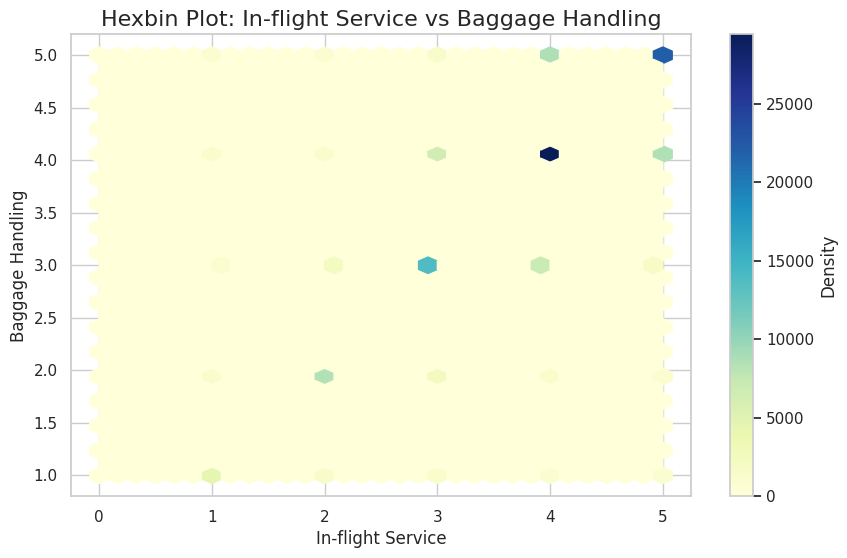

In [ ]:
# Hexbin plot for In-flight Service vs Baggage Handling
plt.figure(figsize=(10, 6))
plt.hexbin(df['In-flight Service'], df['Baggage Handling'], gridsize=30, cmap='YlGnBu')
plt.colorbar(label='Density')
plt.title('Hexbin Plot: In-flight Service vs Baggage Handling', fontsize=16)
plt.xlabel('In-flight Service', fontsize=12)
plt.ylabel('Baggage Handling', fontsize=12)
plt.show()

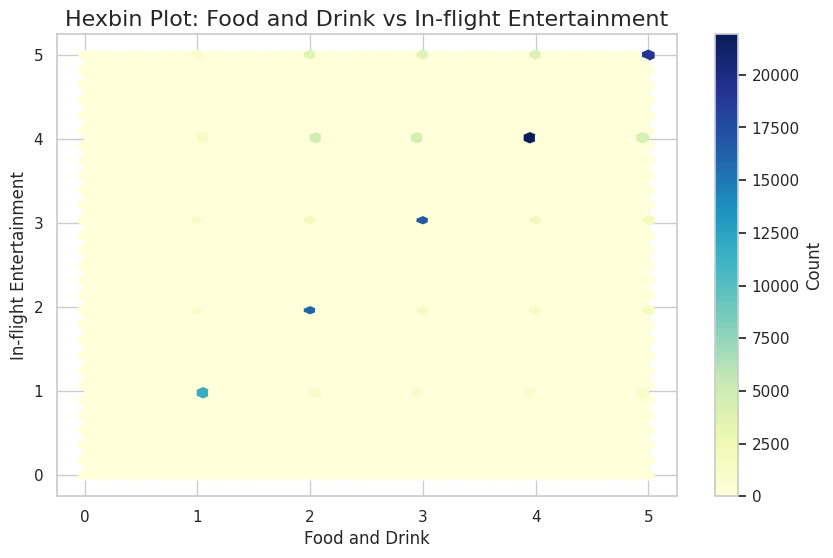

In [ ]:
# Hexbin Plot for Food and Drink vs In-flight Entertainment
plt.figure(figsize=(10, 6))
plt.hexbin(df['Food and Drink'], df['In-flight Entertainment'], gridsize=50, cmap='YlGnBu')
plt.colorbar(label='Count')
plt.title('Hexbin Plot: Food and Drink vs In-flight Entertainment', fontsize=16)
plt.xlabel('Food and Drink', fontsize=12)
plt.ylabel('In-flight Entertainment', fontsize=12)
plt.show()

In-flight Entertainment vs. Seat Comfort

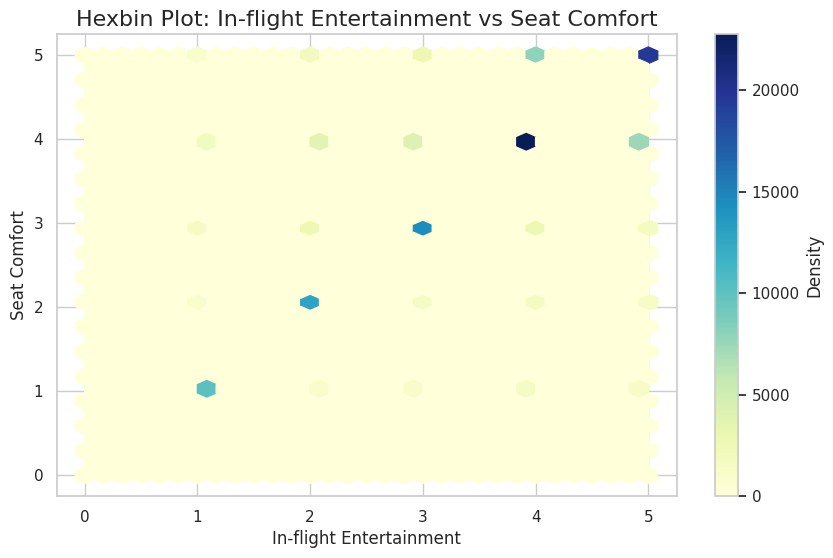

In [ ]:
# Hexbin plot for In-flight Entertainment vs Seat Comfort
plt.figure(figsize=(10, 6))
plt.hexbin(df['In-flight Entertainment'], df['Seat Comfort'], gridsize=30, cmap='YlGnBu')
plt.colorbar(label='Density')
plt.title('Hexbin Plot: In-flight Entertainment vs Seat Comfort', fontsize=16)
plt.xlabel('In-flight Entertainment', fontsize=12)
plt.ylabel('Seat Comfort', fontsize=12)
plt.show()